<a href="https://colab.research.google.com/github/JahnaviVanga/online-payment-fraud-transaction-detection/blob/main/Online_payment_Fraud_transaction_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
td = pd.read_csv('/content/online payment fraud transaction detection.csv')
print(td)

         step      type     amount customer_starting_transaction  oldbalance  \
0           1   PAYMENT    9839.64                   C1231006815   170136.00   
1           1   PAYMENT    1864.28                   C1666544295    21249.00   
2           1  TRANSFER     181.00                   C1305486145      181.00   
3           1  CASH_OUT     181.00                    C840083671      181.00   
4           1   PAYMENT   11668.14                   C2048537720    41554.00   
...       ...       ...        ...                           ...         ...   
1048570    95  CASH_OUT  132557.35                   C1179511630   479803.00   
1048571    95   PAYMENT    9917.36                   C1956161225    90545.00   
1048572    95   PAYMENT   14140.05                   C2037964975    20545.00   
1048573    95   PAYMENT   10020.05                   C1633237354    90605.00   
1048574    95   PAYMENT   11450.03                   C1264356443    80584.95   

         newbalance Recipient_transacti

In [ ]:
#(rows,columns)

td.shape

(1048575, 11)

In [ ]:
#data types

td.dtypes

,0
step,int64
type,object
amount,float64
customer_starting_transaction,object
oldbalance,float64
newbalance,float64
Recipient_transaction,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


In [ ]:
td.isnull()

,step,type,amount,customer_starting_transaction,oldbalance,newbalance,Recipient_transaction,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False,False,False,False,False
1048571,False,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,False,False,False,False,False,False,False
1048573,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#finding the missing values

if td.isna().sum().sum() > 0:
    print(f'There are {td.isna().sum().sum()} missing values in the dataset\n')
    td = td.dropna()
    print('Shape after dropping missing values:', td.shape)
else:
    print('There are no missing values in the dataset.')


There are no missing values in the dataset.


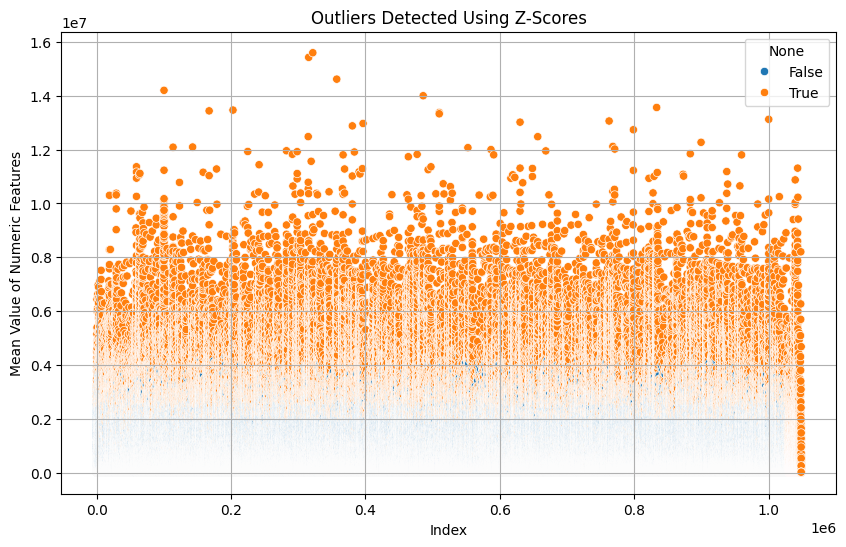

In [ ]:
#handling the outliers

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Calculate Z-scores for all numeric columns
z_scores = np.abs(stats.zscore(td.select_dtypes(include=np.number)))

# Set a threshold to define outliers (e.g., z-score > 3)
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

# Create figure and axis for plotting
plt.figure(figsize=(10, 6))

# Scatter plot: outliers vs non-outliers
# The 'data' argument should be used to pass the DataFrame 'td'
sns.scatterplot(data=td, x=td.index, y=td.select_dtypes(include=np.number).mean(axis=1), hue=outliers)
# Customize the plot
plt.title('Outliers Detected Using Z-Scores')
plt.xlabel('Index')
plt.ylabel('Mean Value of Numeric Features')
plt.grid(True)
plt.show()

In [ ]:
td.columns

Index(['step', 'type', 'amount', 'customer_starting_transaction', 'oldbalance',
       'newbalance', 'Recipient_transaction', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [ ]:
# type feature
td['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
type_counts = td.groupby('type').size()
print(type_counts)


type
CASH_IN     227130
CASH_OUT    373641
DEBIT         7178
PAYMENT     353873
TRANSFER     86753
dtype: int64


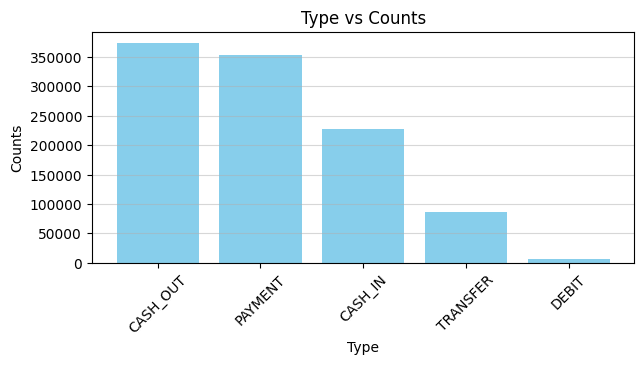

In [ ]:
#barplot to display the type vs counts

# Count the occurrences of each type
type_counts = td['type'].value_counts()

# Create a bar plot
plt.figure(figsize=(7, 3))
plt.bar(type_counts.index, type_counts.values, color='skyblue')

# Add titles and labels
plt.title('Type vs Counts')
plt.xlabel('Type')
plt.ylabel('Counts')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid(axis='y', alpha=0.5)

# Show the plot
plt.show()


In [ ]:
pip install colorama


In [ ]:
from colorama import Fore, Style

# Display the type that is used more and which is used less
most_common_type = type_counts.idxmax()
most_common_count = type_counts.max()
least_common_type = type_counts.idxmin()
least_common_count = type_counts.min()

# Print with colors
print(Fore.GREEN + f'Most Common Type: {most_common_type} (Count: {most_common_count})' + Style.RESET_ALL)
print(Fore.RED + f'Least Common Type: {least_common_type} (Count: {least_common_count})' + Style.RESET_ALL)

Most Common Type: CASH_OUT (Count: 373641)
Least Common Type: DEBIT (Count: 7178)


In [ ]:


# Sample DataFrame for demonstration
data = pd.DataFrame({
    'type': ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT', 'CASH_OUT', 'PAYMENT']
})

# Convert types to numeric values using factorize
data['type_numeric'], unique_types = pd.factorize(data['type'])

# Get counts of each type after conversion
type_counts = data['type'].value_counts()

# Display the DataFrame with numeric values and the counts
print(data)
print("\nCounts of each type:")
print(type_counts)


       type  type_numeric
0  CASH_OUT             0
1   PAYMENT             1
2   CASH_IN             2
3  TRANSFER             3
4     DEBIT             4
5  CASH_OUT             0
6   PAYMENT             1

Counts of each type:
type
CASH_OUT    2
PAYMENT     2
CASH_IN     1
TRANSFER    1
DEBIT       1
Name: count, dtype: int64


In [ ]:
# labels for isfraud
td['isFraud'].unique()

array([0, 1])

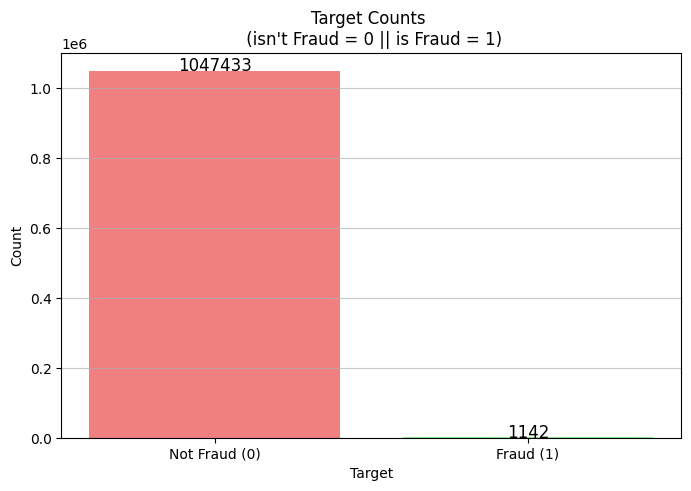

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each target value
target_counts = td['isFraud'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(target_counts.index, target_counts.values, color=['lightcoral', 'lightgreen'])

# Add titles and labels
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Counts \n (isn\'t Fraud = 0 || is Fraud = 1)')

# Add value annotations on top of the bars
for i, count in enumerate(target_counts.values):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12)

# Set x-ticks to ensure they are labeled correctly
plt.xticks(target_counts.index, ['Not Fraud (0)', 'Fraud (1)'])

# Enable the grid on the y-axis for better readability
plt.grid(axis='y', alpha=0.7)

# Show the plot
plt.show()


In [ ]:
#removing unnecessary columns

td.drop(['customer_starting_transaction', 'Recipient_transaction'], axis=1, inplace=True)
td.shape

(1048575, 9)

In [ ]:
#feature extraction

# Assuming 'type' is the problematic column in DataFrame 'td'
# Convert 'type' column to numeric using pd.factorize

# Create a mapping of type values to numeric values
type_mapping = {type_val: i for i, type_val in enumerate(td['type'].unique())}

# Apply the mapping to the 'type' column
td['type_numeric'] = td['type'].map(type_mapping)

# Select only numeric columns for correlation calculation
numeric_td = td.select_dtypes(include=['number'])

correlation_matrix = numeric_td.corr()
print(correlation_matrix)

                    step    amount  oldbalance  newbalance  oldbalanceDest  \
step            1.000000 -0.025996   -0.006780   -0.007180       -0.002251   
amount         -0.025996  1.000000    0.004864   -0.001133        0.215558   
oldbalance     -0.006780  0.004864    1.000000    0.999047        0.093305   
newbalance     -0.007180 -0.001133    0.999047    1.000000        0.095182   
oldbalanceDest -0.002251  0.215558    0.093305    0.095182        1.000000   
newbalanceDest -0.019503  0.311936    0.064049    0.063725        0.978403   
isFraud         0.045030  0.128862    0.003829   -0.009438       -0.007552   
isFlaggedFraud       NaN       NaN         NaN         NaN             NaN   
type_numeric   -0.015019  0.162821    0.416027    0.430662        0.230082   

                newbalanceDest   isFraud  isFlaggedFraud  type_numeric  
step                 -0.019503  0.045030             NaN     -0.015019  
amount                0.311936  0.128862             NaN      0.162821  


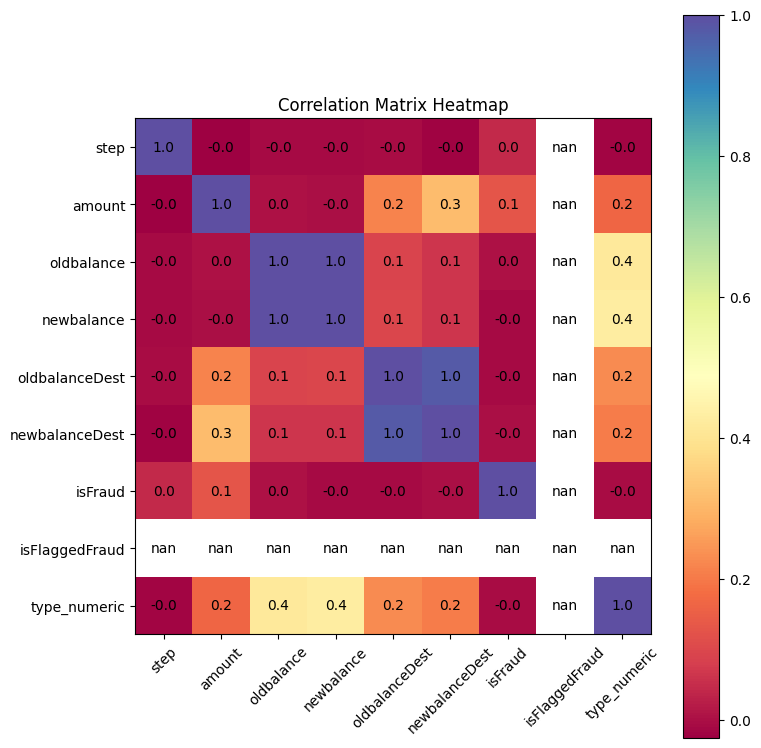

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the correlation matrix, but only on numeric columns
correlation_matrix = td.select_dtypes(include=np.number).corr()

# Create a figure and axis
plt.figure(figsize=(8, 8))

# Create a heatmap using imshow
cax = plt.imshow(correlation_matrix, interpolation='nearest', cmap='Spectral')

# Add a colorbar
plt.colorbar(cax)

# Set the ticks and labels
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)

# Add annotations to the heatmap
for (i, j), val in np.ndenumerate(correlation_matrix.values):
    plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')

# Set title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

correlation = td['oldbalance'].corr(td['newbalance'])

# Display the correlation
print(f"Correlation between 'oldbalance' and 'newbalance': {correlation}")


Correlation between 'oldbalance' and 'newbalance': 0.9990473624122476


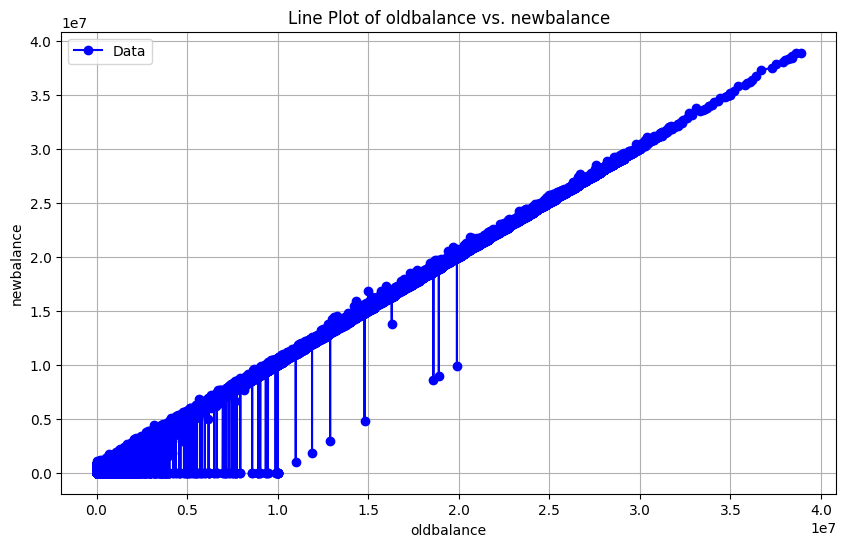

In [ ]:
#line plot


# Sort data for line plot
data_sorted = td.sort_values('oldbalance')

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(data_sorted['oldbalance'], data_sorted['newbalance'], marker='o', linestyle='-', color='b', label='Data')
plt.xlabel('oldbalance')
plt.ylabel('newbalance')
plt.title('Line Plot of oldbalance vs. newbalance')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# dropping unnecessary features
del td['isFlaggedFraud']
del td['step']
td.columns


Index(['type', 'amount', 'oldbalance', 'newbalance', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'type_numeric'],
      dtype='object')

In [ ]:
del td['type_numeric']

In [ ]:
td.shape


(1048575, 7)

In [ ]:
print(td)

             type     amount  oldbalance  newbalance  oldbalanceDest  \
0         PAYMENT    9839.64   170136.00   160296.36            0.00   
1         PAYMENT    1864.28    21249.00    19384.72            0.00   
2        TRANSFER     181.00      181.00        0.00            0.00   
3        CASH_OUT     181.00      181.00        0.00        21182.00   
4         PAYMENT   11668.14    41554.00    29885.86            0.00   
...           ...        ...         ...         ...             ...   
1048570  CASH_OUT  132557.35   479803.00   347245.65       484329.37   
1048571   PAYMENT    9917.36    90545.00    80627.64            0.00   
1048572   PAYMENT   14140.05    20545.00     6404.95            0.00   
1048573   PAYMENT   10020.05    90605.00    80584.95            0.00   
1048574   PAYMENT   11450.03    80584.95    69134.92            0.00   

         newbalanceDest  isFraud  
0                  0.00        0  
1                  0.00        0  
2                  0.00       

In [ ]:
td.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,1048575.0,1.586670e+05,2.649409e+05,0.1,12149.065,76343.33,213761.890,10000000.0
oldbalance,1048575.0,8.740095e+05,2.971751e+06,0.0,0.000,16002.00,136642.020,38900000.0
newbalance,1048575.0,8.938089e+05,3.008271e+06,0.0,0.000,0.00,174599.990,38900000.0
oldbalanceDest,1048575.0,9.781600e+05,2.296780e+06,0.0,0.000,126377.21,915923.475,42100000.0
newbalanceDest,1048575.0,1.114198e+06,2.416593e+06,0.0,0.000,218260.36,1149807.510,42200000.0
isFraud,1048575.0,1.089097e-03,3.298351e-02,0.0,0.000,0.00,0.000,1.0


In [ ]:
#splitting the data and target

# X Data
X = td.drop(['isFraud'], axis=1)
print('X shape is : ' , X.shape)
print()

# y Data
y = td['isFraud']
print('y shape is : ' , y.shape)

X shape is :  (1048575, 6)

y shape is :  (1048575,)


In [ ]:
#splitting the dataset train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Assuming X and y are defined
# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Splitted Data
shapes = (X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print('Shapes of the splitted data (X_train, X_test, y_train, y_test):', shapes)


Shapes of the splitted data (X_train, X_test, y_train, y_test): ((734002, 6), (314573, 6), (734002,), (314573,))


In [ ]:
!pip install pandas
!pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

# Assuming X and y are defined
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Identify categorical and numerical features
categorical_features = ['type']
numerical_features = X_train.select_dtypes(include=['number']).columns

# Create a ColumnTransformer to apply OneHotEncoding to categorical features
# and MinMaxScaler to numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
    ])

# Fit and transform the data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Display the shape of scaled data
print('Shapes of the scaled data (X_train_scaled, X_test_scaled):', (X_train_scaled.shape, X_test_scaled.shape))

Shapes of the scaled data (X_train_scaled, X_test_scaled): ((734002, 10), (314573, 10))


In [ ]:
                                    #DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
Model_DT = DecisionTreeClassifier()

# Fit the model on the scaled training data
Model_DT.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_DT = Model_DT.predict(X_test_scaled)

# Evaluate using accuracy_score
Train_Accuracy = accuracy_score(y_train, Model_DT.predict(X_train_scaled))
Test_Accuracy = accuracy_score(y_test, y_pred_DT)

# Print results
print(f"Training Accuracy: {Train_Accuracy * 100:.2f} %")
print(f"Testing Accuracy: {Test_Accuracy * 100:.2f} %")


Training Accuracy: 100.00 %
Testing Accuracy: 99.95 %


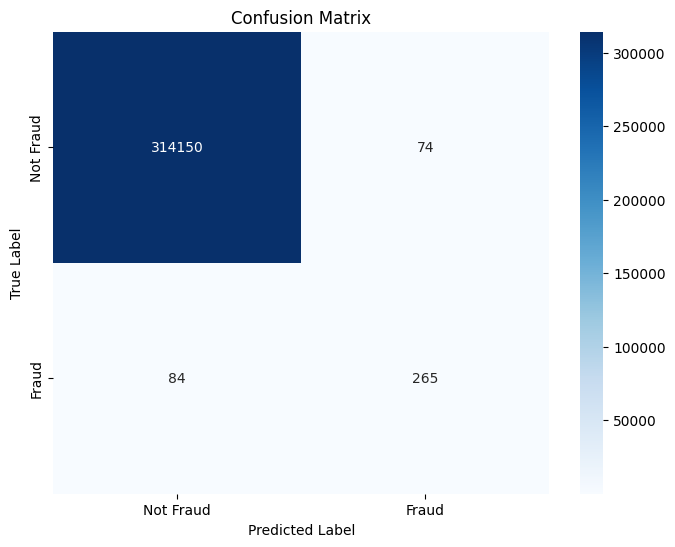

In [ ]:
#confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
CM = confusion_matrix(y_true=y_test, y_pred=y_pred_DT)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])

# Adding titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314224
           1       0.78      0.76      0.77       349

    accuracy                           1.00    314573
   macro avg       0.89      0.88      0.89    314573
weighted avg       1.00      1.00      1.00    314573



In [ ]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # Importing necessary functions
Accuracy_DT = accuracy_score(y_test, y_pred_DT)
print(f'➤➤➤ Accuracy Score : {Accuracy_DT * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_DT = precision_score(y_test, y_pred_DT)
print(f'➤➤➤ Precision Score : {Precision_DT * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_DT = recall_score(y_test, y_pred_DT)
print(f'➤➤➤ Recall Score : {Recall_DT * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_DT = f1_score(y_test, y_pred_DT)
print(f'➤➤➤ F1 Score : {F1_Score_DT * 100 : .2f} %\n')


ROC_AUC_DT = roc_auc_score(y_test, y_pred_DT)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_DT * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  99.95 %

➤➤➤ Precision Score :  78.17 %

➤➤➤ Recall Score :  75.93 %

➤➤➤ F1 Score :  77.03 %

➤➤➤ AUC_ROC :  87.95 %



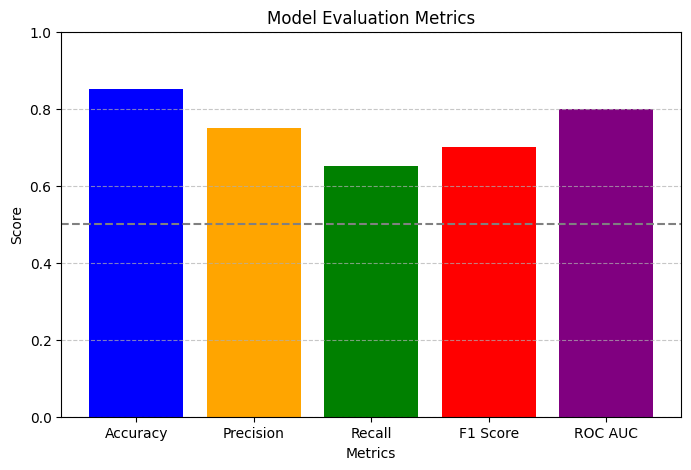

In [ ]:
import matplotlib.pyplot as plt

# New variables for scores (you can assign new values as needed)
model_scores = [0.85, 0.75, 0.65, 0.70, 0.80]  # Example values for the metrics
score_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']  # Adjusted variable names

# Plot
plt.figure(figsize=(8, 5))
plt.bar(score_names, model_scores, color=['blue', 'orange', 'green', 'red', 'purple'])

# Add titles and labels
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits
plt.axhline(y=0.5, color='gray', linestyle='--')  # Add a horizontal line for reference
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
                                                                         #Naive Bayes


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Split into train, validation, and holdout
X_train_val, X_holdout, y_train_val, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


# Assuming 'X' is original feature data
# Create a scaler object
scaler = StandardScaler()

# Select only numerical features for scaling
numerical_features = X_train.select_dtypes(include=['number']).columns

# Fit the scaler on the numerical features of the training data and transform
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_features]),
                               columns=numerical_features,
                               index=X_train.index)

# Transform the validation and holdout data using the trained scaler
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numerical_features]),
                             columns=numerical_features,
                             index=X_val.index)

X_holdout_scaled = pd.DataFrame(scaler.transform(X_holdout[numerical_features]),
                                 columns=numerical_features,
                                 index=X_holdout.index)  # Scale the holdout data before prediction


# 2. Train and tune on train/validation
model = GaussianNB()
# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# 3. Evaluate on the holdout set
y_pred_holdout = model.predict(X_holdout_scaled)
holdout_accuracy = accuracy_score(y_holdout, y_pred_holdout)
print(f"Holdout Accuracy: {holdout_accuracy}")

Holdout Accuracy: 0.9861144887108695


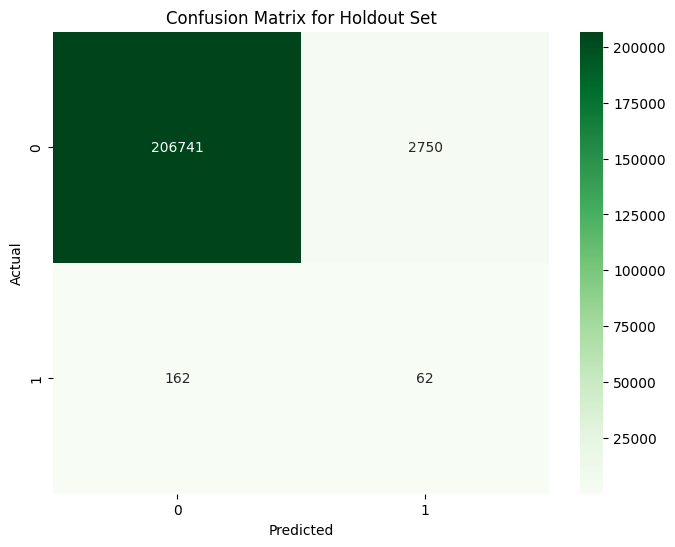

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_holdout, y_pred_holdout)

# Visualize the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Holdout Set')
plt.show()

In [ ]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_features]),
                              columns=numerical_features,
                              index=X_test.index)
y_pred_NB = model.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    314224
           1       0.02      0.28      0.04       349

    accuracy                           0.99    314573
   macro avg       0.51      0.63      0.52    314573
weighted avg       1.00      0.99      0.99    314573



In [ ]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # Importing necessary functions
Accuracy_NB = accuracy_score(y_test, y_pred_NB)
print(f'➤➤➤ Accuracy Score : {Accuracy_NB * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_NB = precision_score(y_test, y_pred_NB)
print(f'➤➤➤ Precision Score : {Precision_NB * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_NB = recall_score(y_test, y_pred_NB)
print(f'➤➤➤ Recall Score : {Recall_NB * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_NB = f1_score(y_test, y_pred_NB)
print(f'➤➤➤ F1 Score : {F1_Score_NB * 100 : .2f} %\n')


ROC_AUC_NB = roc_auc_score(y_test, y_pred_NB)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_NB * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  98.60 %

➤➤➤ Precision Score :  2.26 %

➤➤➤ Recall Score :  27.51 %

➤➤➤ F1 Score :  4.18 %

➤➤➤ AUC_ROC :  63.09 %



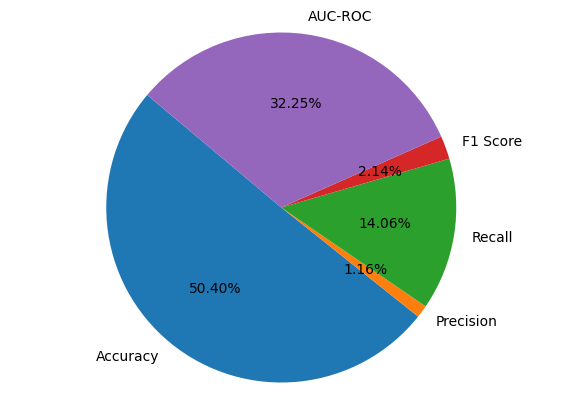

In [ ]:
Scores = [Accuracy_NB, Precision_NB, Recall_NB, F1_Score_NB, ROC_AUC_NB]
Score_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

# Plot
plt.figure(figsize=(7, 5))
plt.pie(Scores, labels=Score_Names, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()


In [ ]:

                                    #RANDOM FOREST




from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
Model_RF = RandomForestClassifier(random_state=42)

# Fit the model on the scaled training data
Model_RF.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_RF = Model_RF.predict(X_test_scaled)

# Quick evaluation
Train_Accuracy_RF = Model_RF.score(X_train_scaled, y_train)
Test_Accuracy_RF = Model_RF.score(X_test_scaled, y_test)

# Print the accuracies
print(f'Training accuracy: {Train_Accuracy_RF * 100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy_RF * 100:.2f} %')


Training accuracy: 100.00 %
Testing accuracy: 99.96 %


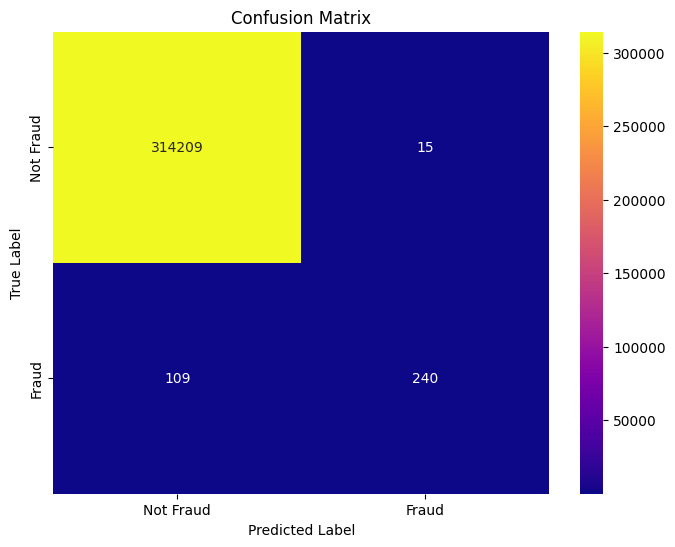

In [ ]:
#confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
CM = confusion_matrix(y_true=y_test, y_pred=y_pred_RF)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='plasma', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])

# Adding titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314224
           1       0.94      0.69      0.79       349

    accuracy                           1.00    314573
   macro avg       0.97      0.84      0.90    314573
weighted avg       1.00      1.00      1.00    314573



In [ ]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # Importing necessary functions
Accuracy_RF = accuracy_score(y_test, y_pred_RF)
print(f'➤➤➤ Accuracy Score : {Accuracy_RF * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_RF = precision_score(y_test, y_pred_RF)
print(f'➤➤➤ Precision Score : {Precision_RF * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_RF = recall_score(y_test, y_pred_RF)
print(f'➤➤➤ Recall Score : {Recall_RF * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_RF = f1_score(y_test, y_pred_RF)
print(f'➤➤➤ F1 Score : {F1_Score_RF * 100 : .2f} %\n')


ROC_AUC_RF = roc_auc_score(y_test, y_pred_RF)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_RF * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  99.96 %

➤➤➤ Precision Score :  94.12 %

➤➤➤ Recall Score :  68.77 %

➤➤➤ F1 Score :  79.47 %

➤➤➤ AUC_ROC :  84.38 %



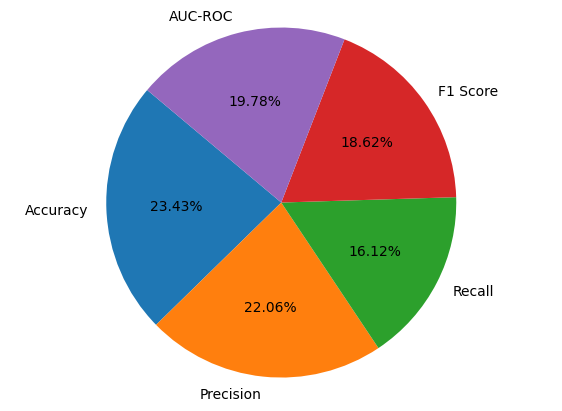

In [ ]:
Scores = [Accuracy_RF, Precision_RF, Recall_RF, F1_Score_RF, ROC_AUC_RF]
Score_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

# Plot
plt.figure(figsize=(7, 5))
plt.pie(Scores, labels=Score_Names, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()


In [ ]:
                                                               #LogisticRegression


from sklearn.linear_model import LogisticRegression
Model_LR = LogisticRegression()
Model_LR.fit(X_train_scaled, y_train)
y_pred_LR = Model_LR.predict(X_test_scaled)

# Quick evaluation
Train_Accuracy = Model_LR.score(X_train_scaled, y_train)
Test_Accuracy = Model_LR.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 99.91 %
Testing accuracy: 99.91 %


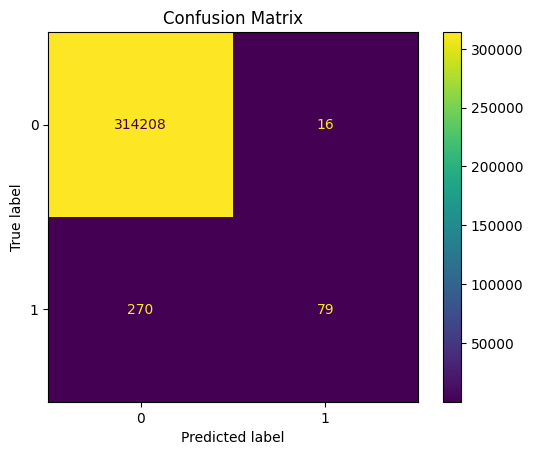

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming 'y_test' contains the true labels and has information about fraud status
# Get unique labels from y_test
display_labels =  list(set(y_test))

CM = confusion_matrix(y_true=y_test, y_pred=y_pred_LR)
ConfusionMatrixDisplay(CM, display_labels=display_labels).plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
Accuracy_LR = accuracy_score(y_test, y_pred_LR)
print(f'➤➤➤ Accuracy Score : {Accuracy_LR * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_LR = precision_score(y_test, y_pred_LR)
print(f'➤➤➤ Precision Score : {Precision_LR * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_LR = recall_score(y_test, y_pred_LR)
print(f'➤➤➤ Recall Score : {Recall_LR * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_LR = f1_score(y_test, y_pred_LR)
print(f'➤➤➤ F1 Score : {F1_Score_LR * 100 : .2f} %\n')


ROC_AUC_LR = roc_auc_score(y_test, y_pred_LR)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_LR * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  99.91 %

➤➤➤ Precision Score :  83.16 %

➤➤➤ Recall Score :  22.64 %

➤➤➤ F1 Score :  35.59 %

➤➤➤ AUC_ROC :  61.32 %



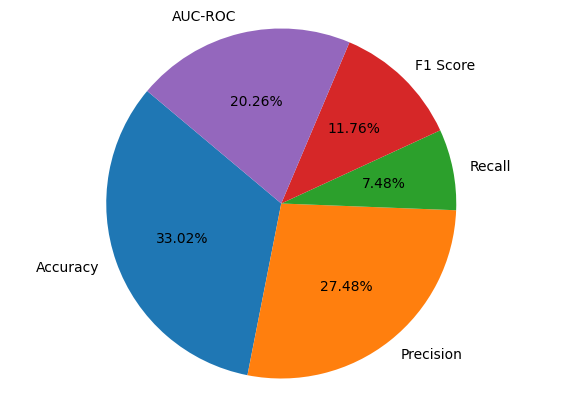

In [ ]:
Scores = [Accuracy_LR, Precision_LR, Recall_LR, F1_Score_LR, ROC_AUC_LR]
Score_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

# Plot
plt.figure(figsize=(7, 5))
plt.pie(Scores, labels=Score_Names, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()

In [ ]:
evaluation = pd.DataFrame({'Model': ['Decision Tree','Naive Bayes','Logistic Regression','Random forest'],
                           'Accuracy': [(Accuracy_DT*100),(Accuracy_NB*100),(Accuracy_LR*100), (Accuracy_RF*100)]})

evaluation

,Model,Accuracy
0,Decision Tree,99.949773
1,Naive Bayes,98.600007
2,Logistic Regression,99.909083
3,Random forest,99.960581
